In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("sample_data/placement.csv")

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


# steps

# 0. Preproces + EDA + Feature selcetion

# 1. Extract inputs and outputs columns

# 2. Scale the values
* between -1 to 1 for better results and error free distance calculation

# 3. Train Test Split
* if you have 100 data u train the model with 90 data and hide the rest 10 data so that when your model is trained you can test your model, like 6 correct out of 10 then 60% accuracy

# 4. Train the model

# 5. Evaluate the model/ model selection
* select the best algorithm among multiple algorithm

# 6. Deploye the model

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
#preprocessing
df = df.iloc[:, 1:] #need all rows, but columns from 1 onward

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

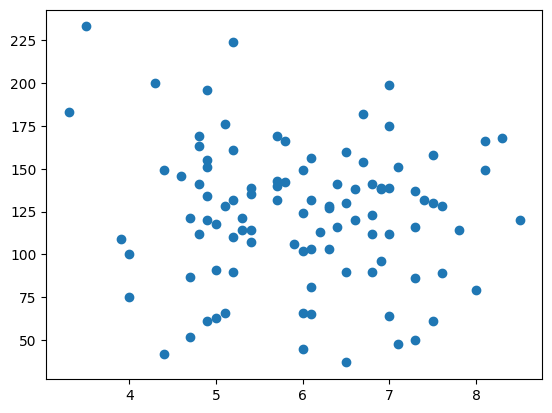

In [ ]:
plt.scatter(df['cgpa'], df['iq']) #EDA

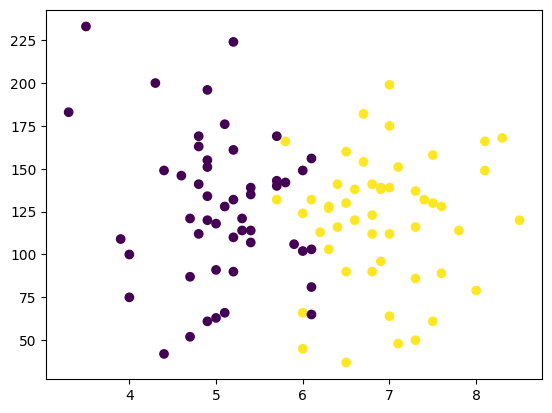

In [ ]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement']) # color encode the placement

In [ ]:
# we will use logistic regression

In [ ]:
# cgpa and iq are independant variable
# dependant variable is placement

In [ ]:
# extract input and output
x = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [ ]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
#train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#input data,  output data,  testsplit size
train_test_split(x, y, test_size=0.1) #10%

[    cgpa     iq
 40   4.9  134.0
 35   6.8   90.0
 69   8.5  120.0
 89   4.9  151.0
 3    7.4  132.0
 ..   ...    ...
 28   5.2   90.0
 45   6.0   66.0
 92   5.2  110.0
 82   6.5   37.0
 46   5.3  114.0
 
 [90 rows x 2 columns],
     cgpa     iq
 2    5.3  121.0
 48   6.6  138.0
 8    6.1  156.0
 90   7.3   86.0
 60   6.9  139.0
 61   7.3  137.0
 34   4.8  163.0
 76   4.9  155.0
 64   7.0   64.0
 33   6.0  149.0,
 40    0
 35    1
 69    1
 89    0
 3     1
      ..
 28    0
 45    1
 92    0
 82    1
 46    0
 Name: placement, Length: 90, dtype: int64,
 2     0
 48    1
 8     0
 90    1
 60    1
 61    1
 34    0
 76    0
 64    1
 33    0
 Name: placement, dtype: int64]

In [ ]:
#above see for x 90 train, 10 test
#for y 90 train, 10test
#this happens randomly

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [ ]:
x_train

,cgpa,iq
30,7.6,128.0
21,7.1,151.0
59,4.8,112.0
44,7.5,61.0
19,5.2,132.0
...,...,...
72,7.3,116.0
29,7.0,112.0
7,5.0,63.0
93,6.8,112.0


In [ ]:
#scaling
#just to show us sir first splited then scaled

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_train

array([[ 1.37296842,  0.06999309],
       [ 0.94833901,  0.64266382],
       [-1.00495626, -0.32838655],
       [ 1.28804254, -1.59822164],
       [-0.66525274,  0.169588  ],
       [-0.92003038,  1.76310655],
       [ 0.86341313,  0.34387909],
       [-1.00495626,  0.39367654],
       [-0.75017862,  0.06999309],
       [ 0.01415431, -0.02960182],
       [-0.66525274,  2.46027091],
       [ 0.77848725,  0.34387909],
       [-0.24062333,  0.169588  ],
       [ 0.86341313, -1.52352546],
       [ 1.11819077, -1.87210764],
       [-0.66525274, -0.87615855],
       [ 0.0990802 ,  0.169588  ],
       [ 1.28804254,  0.11979054],
       [ 0.18400608, -0.30348782],
       [-0.49540098, -0.45288018],
       [-1.00495626,  0.94144854],
       [ 1.79759782,  1.01614473],
       [-0.15569745,  1.01614473],
       [ 1.79759782,  0.59286636],
       [ 1.20311665,  0.169588  ],
       [ 0.26893196,  0.04509436],
       [-1.7692892 , -0.40308273],
       [-1.17480803,  0.51817018],
       [ 0.0990802 ,

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
x_test

array([[-0.07077157, -0.47777891],
       [ 0.94833901, -1.9219051 ],
       [-0.58032686, -0.104298  ],
       [ 0.0990802 , -0.55247509],
       [-0.49540098, -0.27858909],
       [-0.92003038,  0.74225873],
       [ 0.77848725, -0.72676619],
       [ 0.01415431, -1.473728  ],
       [ 0.26893196,  0.06999309],
       [ 0.60863548,  0.71736   ]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

# Model Training

In [ ]:

clf.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#to test the model lets give it x_test and compare with y_test

In [ ]:
clf.predict(x_test)

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1])

In [ ]:
y_test

,placement
1,0
5,1
2,0
14,0
41,0
76,0
66,1
45,1
63,1
74,1


In [ ]:
#to compare it

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9

In [ ]:
#to see what our model made to visualize that

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

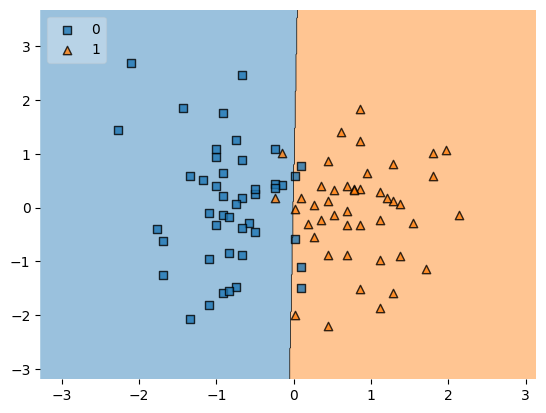

In [ ]:
plot_decision_regions(x_train, y_train.values, clf= clf, legend=2)  #x_train is a numpy array as we already did , but to convert y_train to numpy array we did values

In [ ]:
import pickle # it converts a obj to a file and then we can use that file to any envirnment

In [ ]:
pickle.dump(clf, open('model.pkl', 'wb')) #wb is mode - write binary